![data-x](http://oi64.tinypic.com/o858n4.jpg)


# CATS vs DOGS 
## TensorFlow (for Python 2 or 3)
---

### Code for extracting Bottleneck features and train model 

**Author:** Alexander Fred Ojala

**Copright:** Feel free to do whatever you want with this code.

___

In [1]:
!ls

'''
Files /Folders needed:

data/
data-x_hw7_tensorflow_py35.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
'''
''

data
data-x_hw7_tensorflow_py35.ipynb
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


''

In [1]:
# Look at files, note all cat images and dog images are unique
from __future__ import absolute_import, division, print_function
import os
for path, dirs, files in os.walk('./data'):
    print('FOLDER',path)
    for f in files[:4]:
        print(f)

FOLDER ./data
.DS_Store
FOLDER ./data\test
FOLDER ./data\test\catvdog
try001.jpg
try002.jpg
try003.jpg
try004.jpg
FOLDER ./data\train
FOLDER ./data\train\cats
cat0001.jpg
cat0002.jpg
cat0003.jpg
cat0004.jpg
FOLDER ./data\train\dogs
dog0001.jpg
dog0002.jpg
dog0003.jpg
dog0004.jpg
FOLDER ./data\validation
FOLDER ./data\validation\cats
cat001001.jpg
cat001002.jpg
cat001003.jpg
cat001004.jpg
FOLDER ./data\validation\dogs
dog001001.jpg
dog001002.jpg
dog001003.jpg
dog001004.jpg


In [2]:
print('Number of cat training images:', len(next(os.walk('./data/train/cats'))[2]))
print('Number of dog training images:', len(next(os.walk('./data/train/dogs'))[2]))
print('Number of cat validation images:', len(next(os.walk('./data/validation/cats'))[2]))
print('Number of dog validation images:', len(next(os.walk('./data/validation/dogs'))[2]))
print('Number of uncategorized test images:', len(next(os.walk('./data/test/catvdog'))[2]))

# There should be 1000 train cat images, 1000 train dogs, 400 validation cats, 400 validation dogs, 100 uncategorized

Number of cat training images: 1000
Number of dog training images: 1000
Number of cat validation images: 400
Number of dog validation images: 400
Number of uncategorized test images: 100


In [3]:
# Define variables
TRAIN_DIR = './data/train/'
VAL_DIR = './data/validation/'
TEST_DIR = './data/test/' #one mixed category

img_width, img_height = 150, 150

n_train_samples = 2000
n_validation_samples = 800
n_epoch = 30
n_test_samples = 100

# Important set correct backend and image_dim_ordering
**Set tensorflow backend and image_dim_ordering tf**

set it in the **keras.json** file

On mac it is loacted: ``~/.keras/keras.json`` and / or look here https://keras.io/backend/#switching-from-one-backend-to-another

#### For Windows: 
Start up your python-binary and do the following

        import os
        print(os.path.expanduser('~'))
        # >>> C:\\Users\\Sascha'  # will look different for different OS

- This should be the base-directory
- Keras will build a folder .keras there where keras.json resides (if it was already created). If it's not there, create it there
- Example: C:\\Users\\Sascha\\.keras\\keras.json'

In [4]:
from keras import backend as K
K.set_image_dim_ordering('tf') # note that we need to have tensorflow dimension ordering still because of the weigths.
print('The backend is:',K.backend())
import tensorflow as tf
print(K.image_dim_ordering()) # should say tf
print(tf.__version__) 

Using TensorFlow backend.


The backend is: tensorflow
tf
1.0.1


In [5]:
# Import relevant packages
import h5py
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, ZeroPadding2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import model_from_json
from keras.preprocessing import image

from IPython.display import Image, display

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [22]:
def save_bottleneck_features():

    from keras import applications
    model = applications.vgg16.VGG16(include_top=False, weights='imagenet', \
                                     input_tensor=None, input_shape=(img_width, img_height,3))
    
    print('TensorFlow model loaded')

    datagen = ImageDataGenerator(rescale=1./255)
    
    def generate_features(DIR,n_samples,name_str):
       
        '''This is a generator that will read pictures found in
        subfolers of 'data/*', and indefinitely generate
        batches of image rescaled images used to predict
        the bottleneck features of the images once
        using model.predict_generator(**args**)'''

        print('Generate '+name_str+' image features')

        generator = datagen.flow_from_directory(
            DIR,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
        
        features = model.predict_generator(generator, n_samples)
        np.save('features_'+name_str+'.npy', features) # save bottleneck features to file
    
    generate_features(TEST_DIR, n_test_samples, 'test')
    #generate_features(TRAIN_DIR, n_train_samples, 'train')
    #generate_features(VAL_DIR, n_validation_samples, 'validation')
    
    print('\nDone! Bottleneck features have been saved')

    
save_bottleneck_features()

TensorFlow model loaded
Generate test image features
Found 100 images belonging to 1 classes.

Done! Bottleneck features have been saved


In [23]:
# Preface:
# Obtain class labels and binary classification for validation data
datagen = ImageDataGenerator(rescale=1./255)
val_gen = datagen.flow_from_directory(VAL_DIR,target_size=(img_width, img_height),
                                        batch_size=32,class_mode=None,shuffle=False)

val_labels = val_gen.classes

print('\nClassifications:\n',val_gen.class_indices)
print('\nClass labels:\n',val_labels)

Found 800 images belonging to 2 classes.

Classifications:
 {'dogs': 1, 'cats': 0}

Class labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 

In [24]:
# Load in bottleneck features
# Run the code below to train your CNN with the training data

train_data = np.load('features_train.npy')
train_labels = np.array([0] * (n_train_samples // 2) + [1] * (n_train_samples // 2))

validation_data = np.load('features_validation.npy')
# same as val_labels above
validation_labels = np.array([0] * (n_validation_samples // 2) + [1] * (n_validation_samples // 2))

# Add top layers trained ontop of extracted VGG features
# Small fully connected model trained on top of the stored features
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

'''
#We end the model with a single unit and a sigmoid activation, which is perfect for a binary classification. 
#To go with it we will also use the binary_crossentropy loss to train our model.

'''
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels,
          nb_epoch=n_epoch, batch_size=32,
          validation_data=(validation_data, validation_labels)) # fit the model
print('Done!')

C:\Users\Yong-Chan\Anaconda3\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2000 samples, validate on 800 samples
Epoch 1/30
2000/2000 [==============================] - 7s - loss: 0.8729 - acc: 0.7515 - val_loss: 0.3864 - val_acc: 0.8125
Epoch 2/30
2000/2000 [==============================] - 4s - loss: 0.3733 - acc: 0.8425 - val_loss: 0.2711 - val_acc: 0.8812
Epoch 3/30
2000/2000 [==============================] - 4s - loss: 0.2969 - acc: 0.8855 - val_loss: 0.2300 - val_acc: 0.9025
Epoch 4/30
2000/2000 [==============================] - 4s - loss: 0.2590 - acc: 0.8955 - val_loss: 0.5418 - val_acc: 0.8087
Epoch 5/30
2000/2000 [==============================] - 5s - loss: 0.2225 - acc: 0.9115 - val_loss: 0.2334 - val_acc: 0.9150
Epoch 6/30
2000/2000 [==============================] - 5s - loss: 0.1931 - acc: 0.9160 - val_loss: 0.2743 - val_acc: 0.8850
Epoch 7/30
2000/2000 [==============================] - 5s - loss: 0.1622 - acc: 0.9380 - val_loss: 0.2830 - val_acc: 0.8925
Epoch 8/30
2000/2000 [==============================] - 5s - loss: 0.1588 - ac

In [25]:
val_pred_class = model.predict_classes(validation_data,verbose=0)
val_pred_prob = model.predict_proba(validation_data,verbose=0)

print('Accuracy on validation set: ',(val_pred_class.ravel()==val_labels).sum()/800.*100,'%')

Accuracy on validation set:  90.75 %




I think this is a DOG with 53.39628% probability


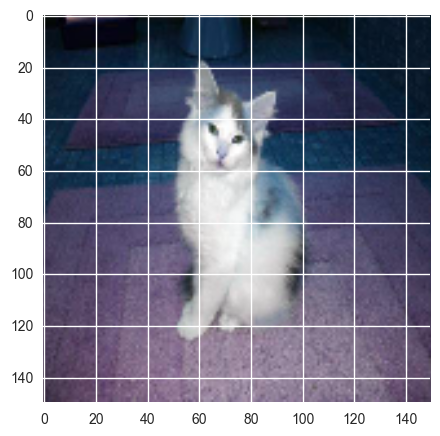



I think this is a CAT with 99.99304% probability


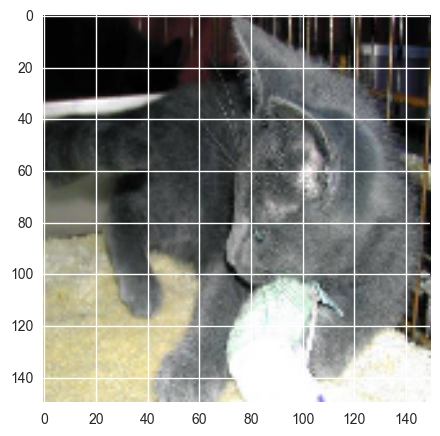



I think this is a CAT with 100.0% probability


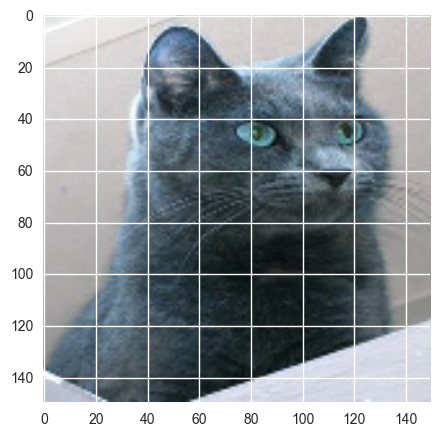



I think this is a DOG with 100.0% probability


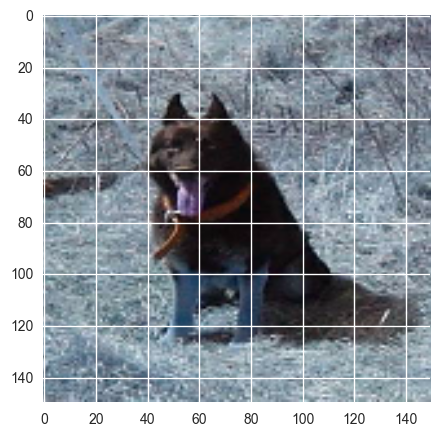



I think this is a CAT with 100.0% probability


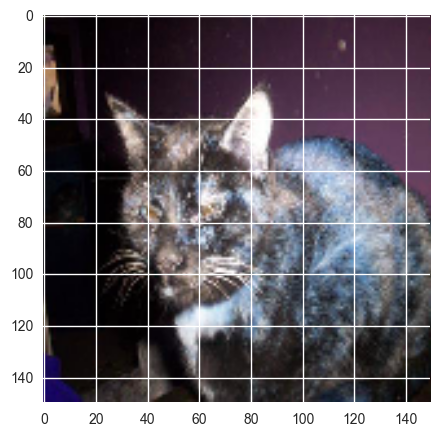



I think this is a CAT with 99.99993% probability


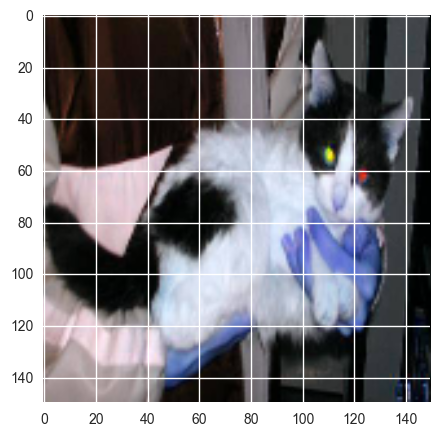



I think this is a CAT with 99.99996% probability


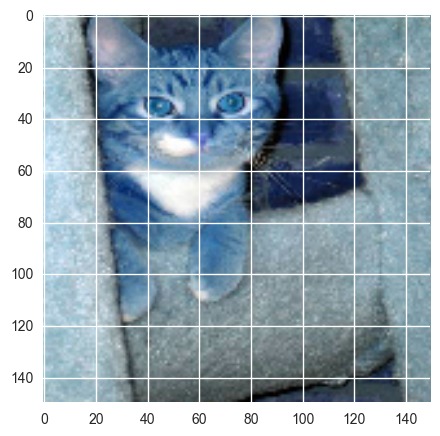



I think this is a CAT with 99.99999% probability


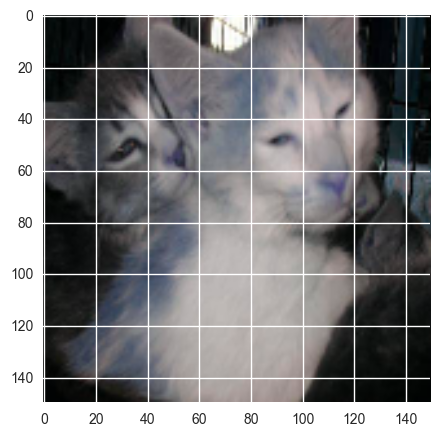



I think this is a DOG with 100.0% probability


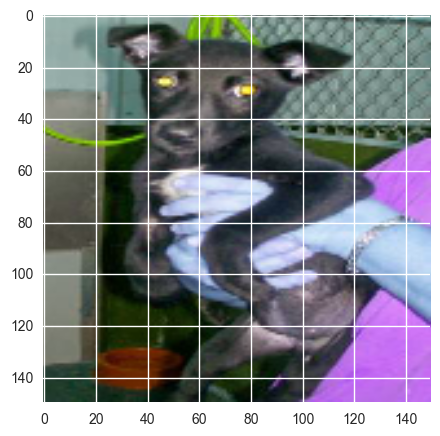



I think this is a DOG with 100.0% probability


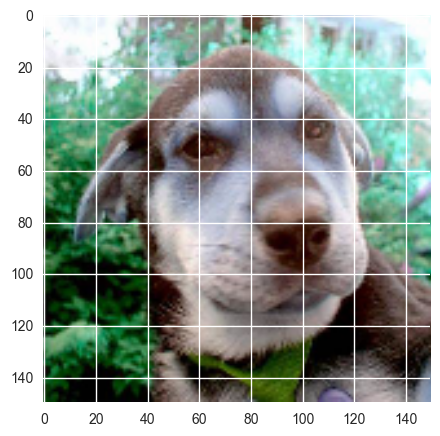



I think this is a CAT with 100.0% probability


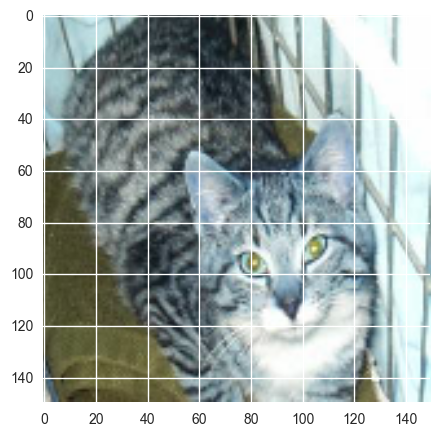



I think this is a DOG with 100.0% probability


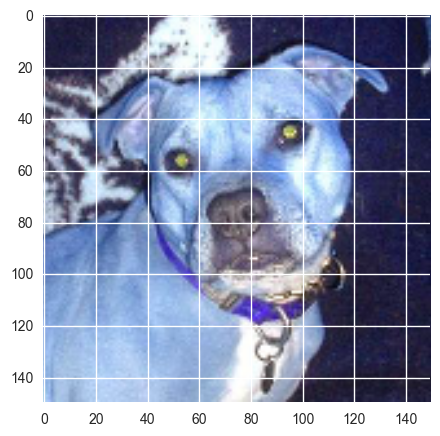



I think this is a CAT with 100.0% probability


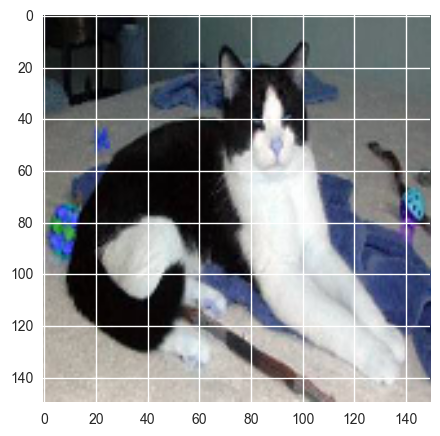



I think this is a DOG with 100.0% probability


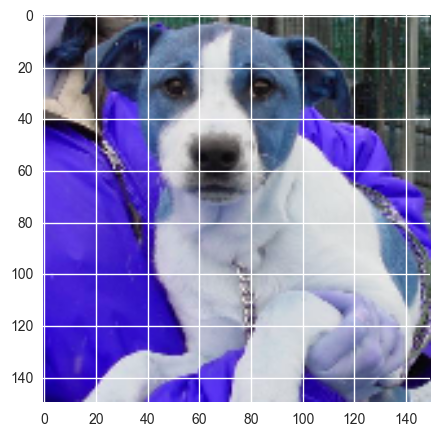



I think this is a CAT with 99.93885% probability


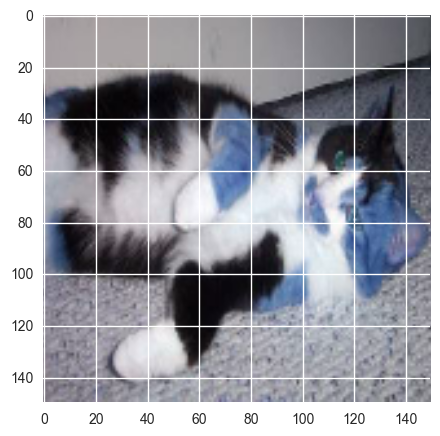



I think this is a DOG with 100.0% probability


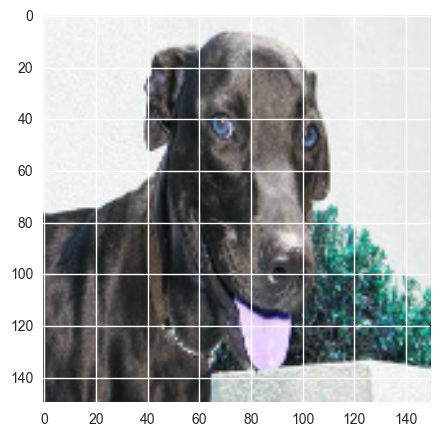



I think this is a DOG with 99.99816% probability


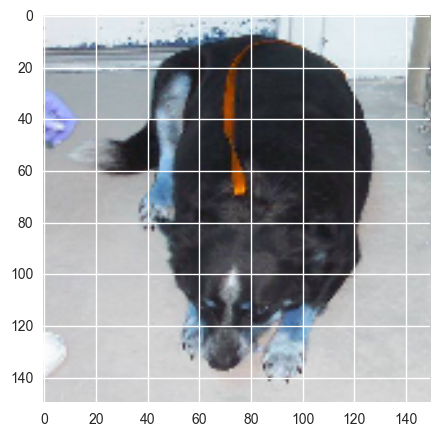



I think this is a CAT with 99.99996% probability


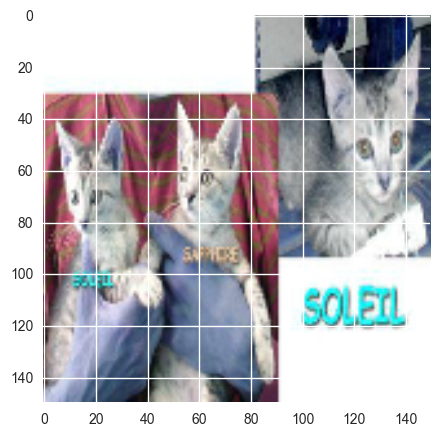



I think this is a DOG with 100.0% probability


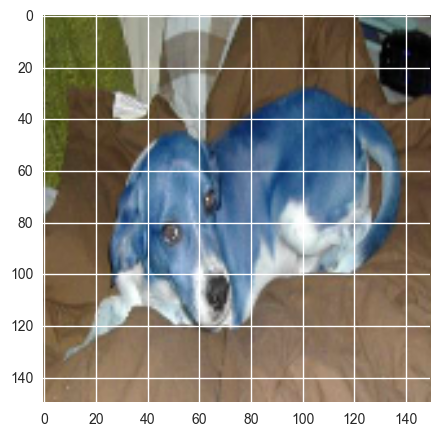

In [28]:
#test_data = np.load(open('features_test.npy'))
test_data = np.load('features_test.npy')

test_images =  [TEST_DIR+'catvdog/'+img for img in os.listdir(TEST_DIR+'catvdog/')]

def read_image(file_path):
    # For image visualization
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (img_height, img_width), interpolation=cv2.INTER_CUBIC)

def plot_pic(img):
    # Plot openCV pic
    pic = read_image(img)    
    plt.figure(figsize=(5,5))
    plt.imshow(pic)
    plt.show()

def predict(mod,i=0,r=None):
    if r==None:
        r=[i]
        
    for idx in r:
        class_pred = mod.predict_classes(test_data,verbose=0)[idx]
        prob_pred = mod.predict_proba(test_data,verbose=0)[idx]
        
        if class_pred ==0:
            prob_pred = 1-prob_pred
            class_guess='CAT'
        else:
            class_guess='DOG'
        
        print('\n\nI think this is a ' + class_guess + ' with ' +str(round(float(prob_pred)*100,5)) + '% probability')
        plot_pic(test_images[idx])

predict(model,r=range(1,20))